## Exercici 1
**Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.**

In [30]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor, LazyClassifier
import pyforest
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental    import enable_hist_gradient_boosting
from sklearn.ensemble        import HistGradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('housing data (3).csv')
df.columns=["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
1,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
2,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
3,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
4,0.03,0.00,2.18,0,0.46,6.43,58.70,6.06,3,222.00,18.70,394.12,5.21,28.70


In [4]:
df.shape

(505, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00
mean,3.62,11.35,11.15,0.07,0.55,6.28,68.58,3.79,9.57,408.46,18.46,356.59,12.67,22.53
std,8.61,23.34,6.86,0.25,0.12,0.70,28.18,2.11,8.71,168.63,2.16,91.37,7.14,9.21
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.88,45.00,2.10,4.00,279.00,17.40,375.33,7.01,17.00
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.70,3.20,5.00,330.00,19.10,391.43,11.38,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.10,5.21,24.00,666.00,20.20,396.21,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<AxesSubplot:>

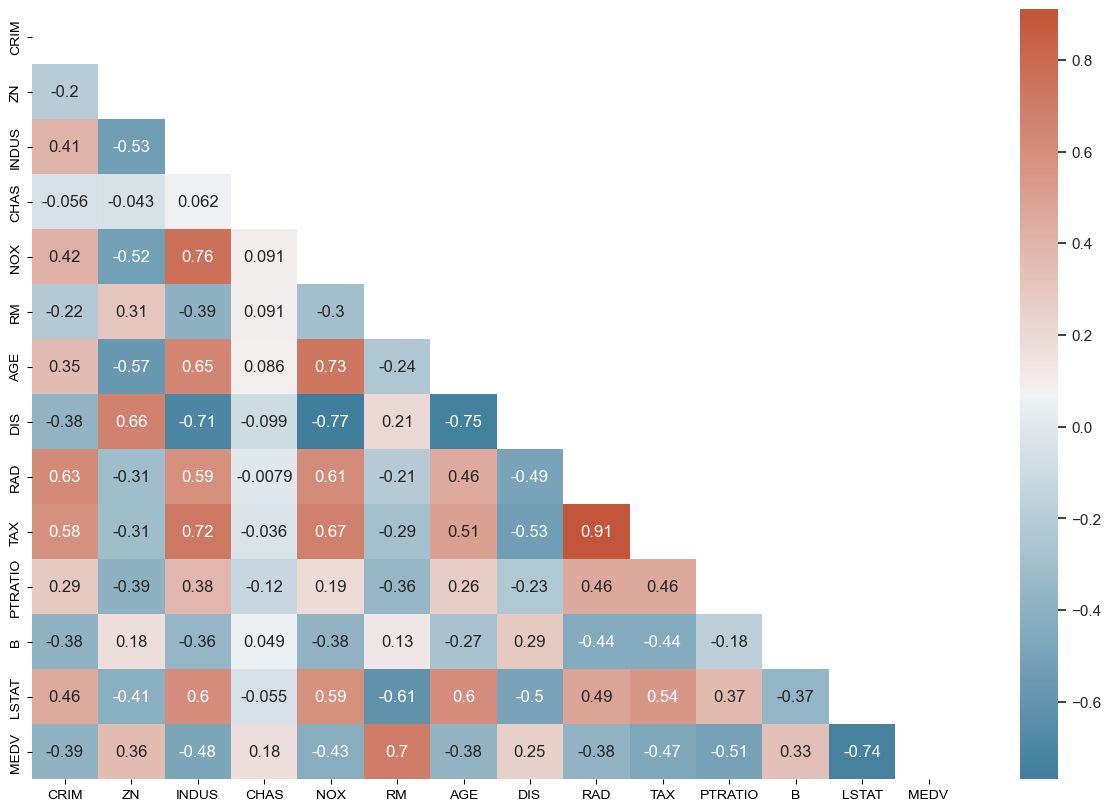

In [6]:
# matriu de correlació
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="white")
matrix = np.triu(df.corr())
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap=cmap)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
# Matrix
X = df.drop('MEDV', axis = 'columns')
# Vector
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

In [9]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:02<00:00, 14.01it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.90       0.91  2.81        0.12
XGBRegressor                                 0.89       0.90  2.96        0.13
ExtraTreesRegressor                          0.88       0.90  3.06        0.22
BaggingRegressor                             0.88       0.89  3.10        0.04
RandomForestRegressor                        0.86       0.87  3.37        0.33
HistGradientBoostingRegressor                0.84       0.86  3.57        0.38
LGBMRegressor                                0.83       0.85  3.66        0.08
DecisionTreeRegressor                        0.82       0.84  3.77        0.01
KNeighborsRegressor                          0.78       0.80  4.20        0.02
AdaBoostRegressor                            0.76       0.79  4.36        0.11
PoissonRegressor                             0.74   

In [10]:
# Rregression lineal
reg_all = LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

r2_reg = reg_all.score(X_test, y_test)
print("R^2: {}".format(r2_reg))

rmse_reg = np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error: {}".format(rmse_reg))

R^2: 0.7290079397855709
Root Mean Squared Error: 4.931520902712229


In [12]:
# model Ridge
ridge =Ridge()

ridge.fit(X_train,y_train)


y_pred = ridge.predict(X_test)


r2_ridge = ridge.score(X_test, y_test)
print("R^2: {}".format(r2_ridge))
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse_ridge))

R^2: 0.7236332276602604
Root Mean Squared Error: 4.980185370071364


## Exercici 2
**Compara’ls en base al MSE i al R2.**

In [13]:
data = {'R^2':[r2_reg,r2_ridge], 'RMSE':[rmse_reg,rmse_ridge]}  
df = pd.DataFrame(data, index =[' GradientBoostingRegressor', 'Ridge_regression'])  
df

,R^2,RMSE
GradientBoostingRegressor,0.73,4.93
Ridge_regression,0.72,4.98


## Exercici 3
**Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

params_Ridge = {'alpha': [1,0.1,0.01,0] }

ridge =Ridge()

rigde_grid = GridSearchCV(ridge,params_Ridge, cv=3)

rigde_grid.fit(X_train,y_train)


y_pred = rigde_grid.predict(X_test)


print("Tuned lineal Regression Parameters: {}".format(rigde_grid.best_params_)) 

r2_ridge_grid = rigde_grid.best_score_

print("Best score is {}".format(r2_ridge_grid))

rmse_rigde_grid = np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error: {}".format(rmse_rigde_grid))

Tuned lineal Regression Parameters: {'alpha': 0.1}
Best score is 0.7020194466191066
Root Mean Squared Error: 4.346716392689533


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)

params = {'alpha': [1,0.1,0.01,0]}
lasso = Lasso()

lasso_grid = GridSearchCV(lasso, params, cv = 3)

lasso_grid.fit(X_train, y_train)

y_pred = lasso_grid.predict(X_test)

print("Tuned lineal Regression Parameters: {}".format(lasso_grid.best_params_)) 

r2_lasso_grid = lasso_grid.best_score_
print("Best score is {}".format(r2_lasso_grid))

rmse_lasso_grid = np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error: {}".format(rmse_lasso_grid))

Tuned lineal Regression Parameters: {'alpha': 0}
Best score is 0.7012409844812857
Root Mean Squared Error: 4.345739709643263


## Exercici 4
**Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).**

In [17]:
ridge = Ridge()
ridge_cv = cross_val_score(ridge,X,y,cv=5)

print(ridge_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))

[ 0.67262052  0.73808531  0.63105077  0.08727661 -0.14959268]
Average 5-Fold CV Score: 0.3958881073924128


In [18]:
lasso = Lasso()
lasso_cv = cross_val_score(lasso,X,y,cv=5)

print(lasso_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(lasso_cv)))

[0.57677391 0.63210745 0.33949861 0.35560713 0.27709816]
Average 5-Fold CV Score: 0.43621705469181693


## Exercici 5
**No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

In [22]:
df = pd.read_csv('housing data (3).csv')
df.columns=["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
1,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
2,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
3,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
4,0.03,0.00,2.18,0,0.46,6.43,58.70,6.06,3,222.00,18.70,394.12,5.21,28.70


In [23]:
# Matrix
X = df.drop(['MEDV','RM'], axis = 'columns')
# Vector
y = df['MEDV']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [26]:
reg2 = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models2, predictions2 = reg2.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.32it/s]


In [32]:
print(models.head(10))

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.90       0.91  2.81        0.12
XGBRegressor                                 0.89       0.90  2.96        0.13
ExtraTreesRegressor                          0.88       0.90  3.06        0.22
BaggingRegressor                             0.88       0.89  3.10        0.04
RandomForestRegressor                        0.86       0.87  3.37        0.33
HistGradientBoostingRegressor                0.84       0.86  3.57        0.38
LGBMRegressor                                0.83       0.85  3.66        0.08
DecisionTreeRegressor                        0.82       0.84  3.77        0.01
KNeighborsRegressor                          0.78       0.80  4.20        0.02
AdaBoostRegressor                            0.76       0.79  4.36        0.11


In [33]:
# Rregression lineal
reg_all = LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

r2_reg = reg_all.score(X_test, y_test)
print("R^2: {}".format(r2_reg))

rmse_reg = np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error: {}".format(rmse_reg))

R^2: 0.7087044414124847
Root Mean Squared Error: 5.3545200133679876


In [34]:
# model Ridge
ridge =Ridge()

ridge.fit(X_train,y_train)


y_pred = ridge.predict(X_test)


r2_ridge = ridge.score(X_test, y_test)
print("R^2: {}".format(r2_ridge))
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse_ridge))

R^2: 0.7032650099538733
Root Mean Squared Error: 5.404281898743609
